## **Week** **4** **Task**
## **Task** **Name**: **Stock** **Price** **Prediction** - **Apple**
### **Name** **of** **Student**: **Vaishnavi** **Panse**

Importing Libraries

In [2]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import seaborn as sns
sns.set_style('dark')
sns. set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings(action='ignore')

Reading Dataset

In [17]:
dataset="https://raw.githubusercontent.com/VaishnaviPanse/Cureya/main/Apple%20Dataset.csv"
test = pd.read_csv(dataset)
test_df = pd.read_csv(dataset)
test

,Date,Open,High,Low,Close,Volume
0,08/26/2021,148.35,149.12,147.51,147.54,"48,597,199"
1,08/25/2021,149.81,150.32,147.80,148.36,"58,991,301"
2,08/24/2021,149.45,150.86,149.15,149.62,"48,606,434"
3,08/23/2021,148.31,150.19,147.89,149.71,"60,131,809"
4,08/20/2021,147.44,148.50,146.78,148.19,"60,549,633"
...,...,...,...,...,...,...
248,09/01/2020,132.76,134.80,130.53,134.18,"152,470,094"
249,08/31/2020,127.58,131.00,126.00,129.04,"225,702,703"
250,08/28/2020,126.01,126.44,124.58,124.81,"187,629,920"
251,08/27/2020,127.14,127.49,123.83,125.01,"155,552,408"


Null values checking

In [18]:
print(test.isna().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


Data Summarization

In [19]:
print(test.shape)

(253, 6)


In [20]:
print(test.head(10))


         Date    Open    High     Low   Close       Volume
0  08/26/2021  148.35  149.12  147.51  147.54   48,597,199
1  08/25/2021  149.81  150.32  147.80  148.36   58,991,301
2  08/24/2021  149.45  150.86  149.15  149.62   48,606,434
3  08/23/2021  148.31  150.19  147.89  149.71   60,131,809
4  08/20/2021  147.44  148.50  146.78  148.19   60,549,633
5  08/19/2021  145.03  148.00  144.50  146.70   86,960,312
6  08/18/2021  149.80  150.72  146.15  146.36   86,325,992
7  08/17/2021  150.23  151.68  149.09  150.19   92,229,742
8  08/16/2021  148.54  151.19  146.47  151.12  103,558,797
9  08/13/2021  148.97  149.44  148.27  149.10   59,375,008


In [21]:
print(test.tail(10))


           Date    Open    High     Low   Close       Volume
243  09/09/2020  117.26  119.14  115.26  117.32  176,940,500
244  09/08/2020  113.95  118.99  112.68  112.82  231,366,594
245  09/04/2020  120.07  123.70  110.89  120.96  332,607,188
246  09/03/2020  126.91  128.84  120.50  120.88  257,599,594
247  09/02/2020  137.59  137.98  127.00  131.40  200,119,016
248  09/01/2020  132.76  134.80  130.53  134.18  152,470,094
249  08/31/2020  127.58  131.00  126.00  129.04  225,702,703
250  08/28/2020  126.01  126.44  124.58  124.81  187,629,920
251  08/27/2020  127.14  127.49  123.83  125.01  155,552,408
252  08/26/2020  126.18  126.99  125.08  126.52  163,022,264


In [22]:
print(test.describe())


             Open        High         Low       Close
count  253.000000  253.000000  253.000000  253.000000
mean   128.393794  129.835613  126.799368  128.331937
std     10.497615   10.391283   10.707450   10.620761
min    104.540000  110.190000  103.100000  106.840000
25%    120.500000  122.060000  118.960000  120.710000
50%    127.210000  128.320000  126.000000  127.130000
75%    134.830000  135.530000  133.350000  134.390000
max    150.230000  151.680000  149.150000  151.120000


**Visualisation** **of** **the** **attributes** **of** **the** **dataset**.



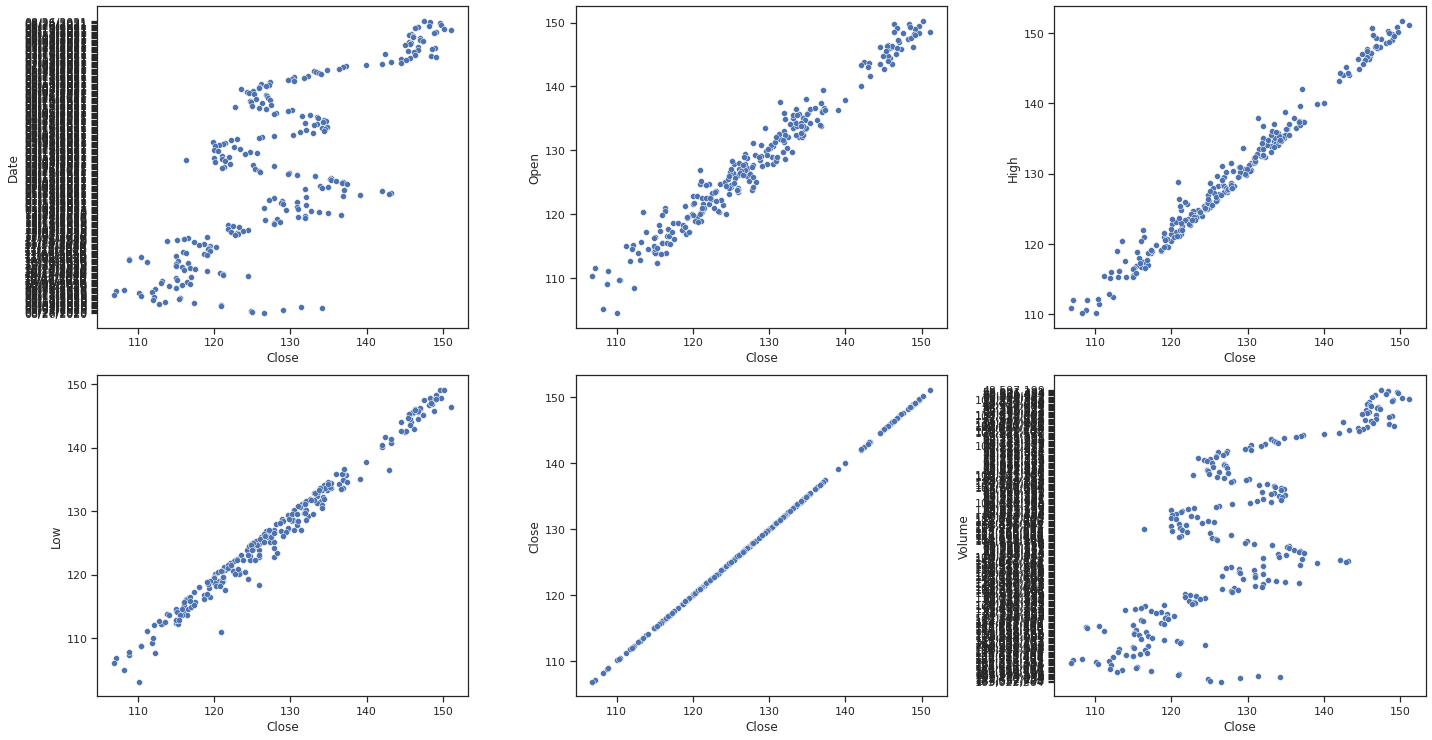

In [25]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in test:
    if plotnumber<=7 :
        ax = plt.subplot(3, 3, plotnumber)
        sns.scatterplot(x = test['Close'], y = test[column])
    
    plotnumber += 1
    

plt.tight_layout()
plt.show()

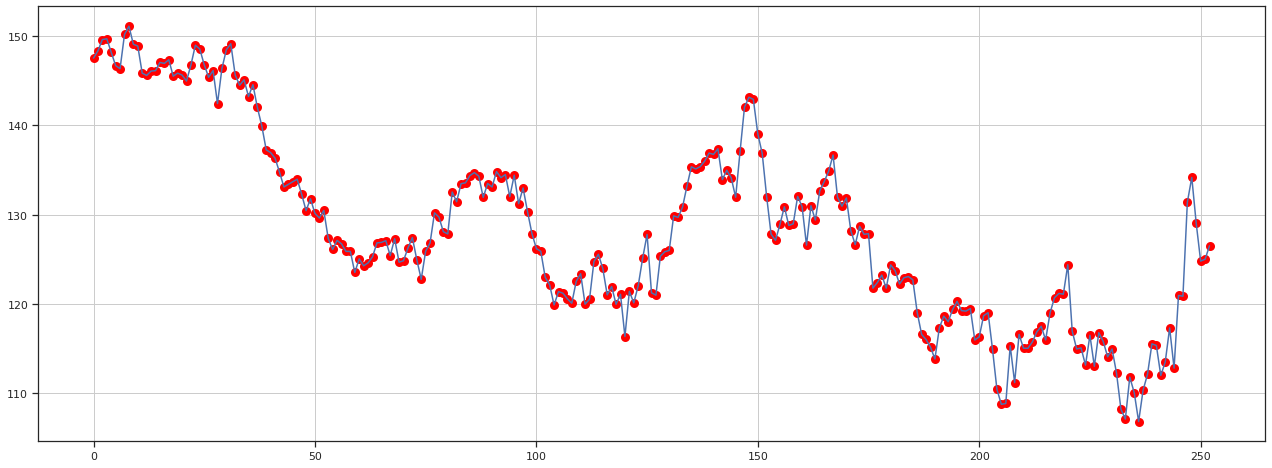

In [27]:
plt.figure(figsize=(22,8))
plt.scatter(test.index,test["Close"],color="Red",lw=3)
plt.plot(test.index,test["Close"])
plt.grid(True)
plt.show()

In [33]:
test.corr()


,Open,High,Low,Close
Open,1.000000,0.993833,0.989407,0.983173
High,0.993833,1.000000,0.988710,0.991465
Low,0.989407,0.988710,1.000000,0.991741
Close,0.983173,0.991465,0.991741,1.000000


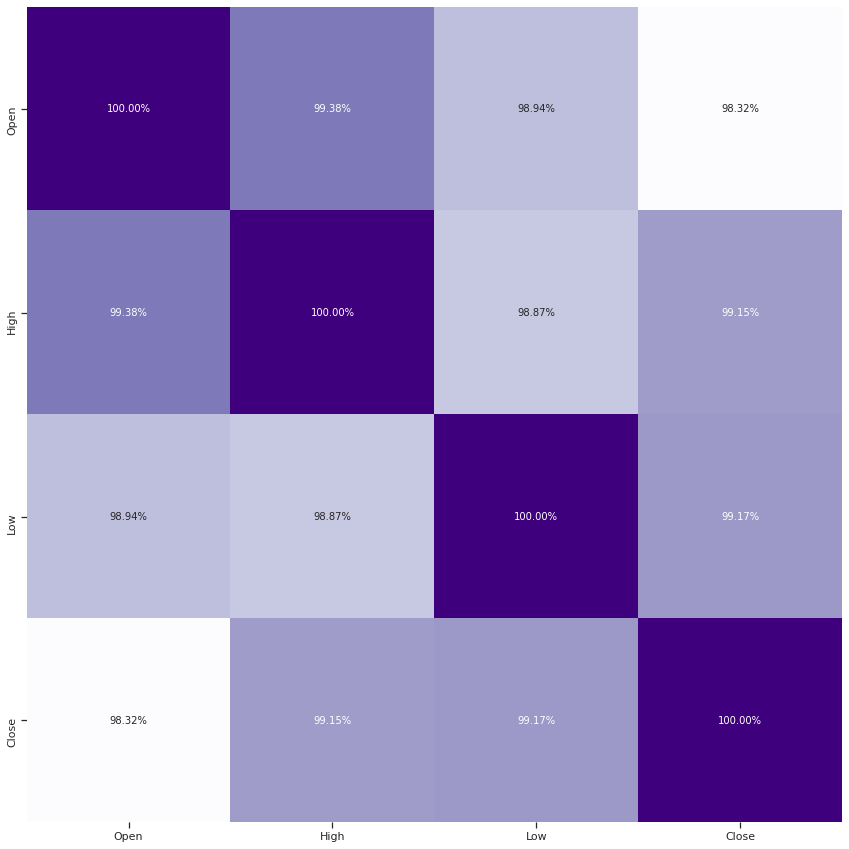

In [96]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Purples')

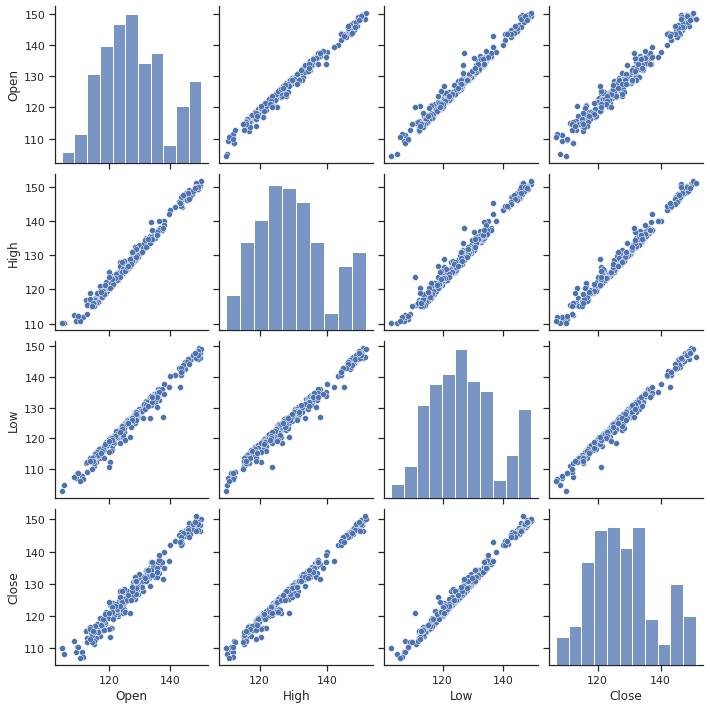

In [38]:
sns.pairplot(test )


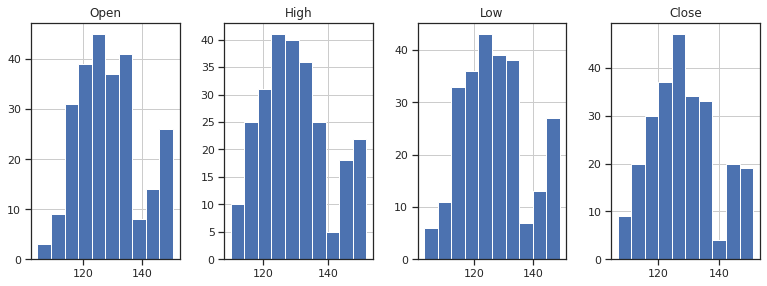

In [39]:
test.hist(figsize=(20,10),layout=(2,6))
plt.show()

**Splitting** **the** **dataset** **into** **training** **and** **testing** **data**

In [44]:
train_data = scaled_data[0:training_data_len, :]
print(len(train_data))
x_train, y_train = [], []

for i in range(100, len(train_data)):
  x_train.append(train_data[i-100:i, 0])
  y_train.append(train_data[i,0])
  if i<=101:
    print(x_train)
    print(y_train)

203
[array([0.91915086, 0.93766938, 0.96612466, 0.96815718, 0.93383017,
       0.90018067, 0.89250226, 0.97899729, 1.        , 0.95438121,
       0.94963866, 0.88121048, 0.87533875, 0.8864047 , 0.88753388,
       0.90831075, 0.90582656, 0.91508582, 0.87353207, 0.88121048,
       0.8762421 , 0.86133695, 0.90176152, 0.95189702, 0.94218609,
       0.90243902, 0.87082204, 0.88775971, 0.80420054, 0.89317977,
       0.9403794 , 0.95551039, 0.8762421 , 0.85049684, 0.86427281,
       0.82204155, 0.85207769, 0.79448961, 0.74796748, 0.68721771,
       0.6802168 , 0.66598916, 0.63098464, 0.5932701 , 0.60004517,
       0.6065944 , 0.6129178 , 0.57497742, 0.53342367, 0.5634598 ,
       0.52642276, 0.51490515, 0.53387534, 0.4631888 , 0.43518519,
       0.45822042, 0.44941283, 0.43044264, 0.4302168 , 0.37714544,
       0.41147245, 0.39385727, 0.40130985, 0.41644083, 0.45189702,
       0.4530262 , 0.45754291, 0.41982836, 0.46228546, 0.40311653,
       0.4067299 , 0.43879855, 0.46544715, 0.40943993, 0.

In [82]:
test_data = scaled_data[0:training_data_len, :]
print(len(test_data))
x_test, y_test = [], []

for i in range(100, len(test_data)):
  x_test.append(test_data[i-100:i, 0])
  y_test.append(test_data[i,0])
  if i<=101:
    print(x_test)
    print(y_test)

203
[array([0.91915086, 0.93766938, 0.96612466, 0.96815718, 0.93383017,
       0.90018067, 0.89250226, 0.97899729, 1.        , 0.95438121,
       0.94963866, 0.88121048, 0.87533875, 0.8864047 , 0.88753388,
       0.90831075, 0.90582656, 0.91508582, 0.87353207, 0.88121048,
       0.8762421 , 0.86133695, 0.90176152, 0.95189702, 0.94218609,
       0.90243902, 0.87082204, 0.88775971, 0.80420054, 0.89317977,
       0.9403794 , 0.95551039, 0.8762421 , 0.85049684, 0.86427281,
       0.82204155, 0.85207769, 0.79448961, 0.74796748, 0.68721771,
       0.6802168 , 0.66598916, 0.63098464, 0.5932701 , 0.60004517,
       0.6065944 , 0.6129178 , 0.57497742, 0.53342367, 0.5634598 ,
       0.52642276, 0.51490515, 0.53387534, 0.4631888 , 0.43518519,
       0.45822042, 0.44941283, 0.43044264, 0.4302168 , 0.37714544,
       0.41147245, 0.39385727, 0.40130985, 0.41644083, 0.45189702,
       0.4530262 , 0.45754291, 0.41982836, 0.46228546, 0.40311653,
       0.4067299 , 0.43879855, 0.46544715, 0.40943993, 0.

In [83]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
print(x_train.shape, y_train.shape)

(103, 100, 1) (103,)


In [84]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape, y_test.shape)

(103, 100, 1) (103,)


**RNN** **model** 

In [85]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [86]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [87]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Training the LSTM Model



In [88]:
lstm_model = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 64, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 6s 1s/step - loss: 0.1574 - val_loss: 0.0645
Epoch 2/100
2/2 [==============================] - 0s 256ms/step - loss: 0.0497 - val_loss: 0.0265
Epoch 3/100
2/2 [==============================] - 0s 264ms/step - loss: 0.0342 - val_loss: 0.0442
Epoch 4/100
2/2 [==============================] - 0s 277ms/step - loss: 0.0393 - val_loss: 0.0205
Epoch 5/100
2/2 [==============================] - 0s 253ms/step - loss: 0.0196 - val_loss: 0.0213
Epoch 6/100
2/2 [==============================] - 0s 260ms/step - loss: 0.0232 - val_loss: 0.0263
Epoch 7/100
2/2 [==============================] - 0s 255ms/step - loss: 0.0263 - val_loss: 0.0250
Epoch 8/100
2/2 [==============================] - 0s 260ms/step - loss: 0.0242 - val_loss: 0.0204
Epoch 9/100
2/2 [==============================] - 0s 256ms/step - loss: 0.0199 - val_loss: 0.0174
Epoch 10/100
2/2 [==============================] - 0s 264ms/step - loss: 0.0170 - val_loss: 0.0181
Epoch 11/100

Prediction

In [89]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

In [90]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

**Graph** **visualization** **of** **the** **the** **Predicted** **stocks**

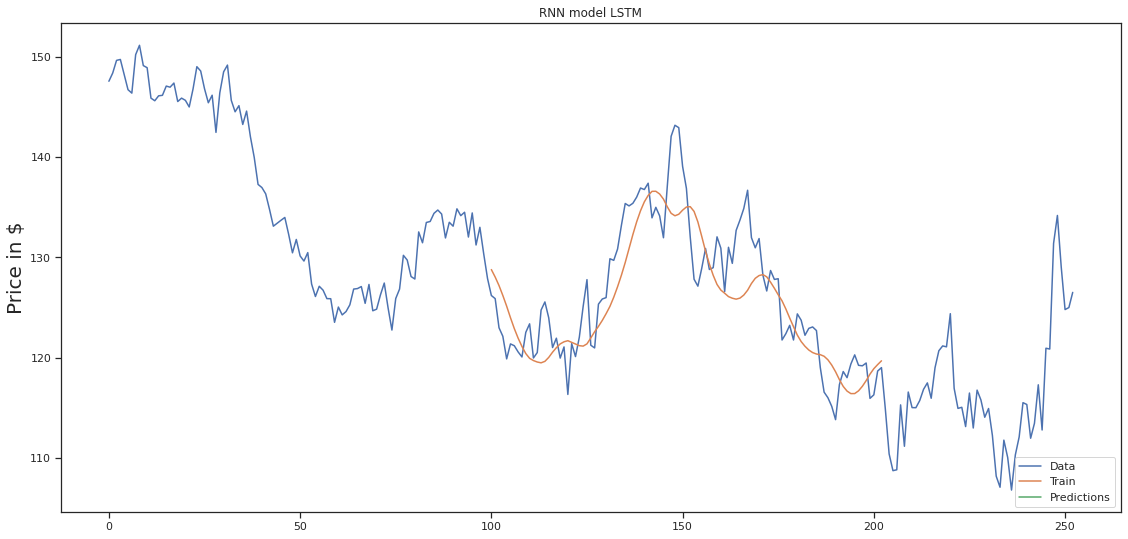

In [93]:
# train predictions
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[100:len(train_predictions)+100, :] = train_predictions
# test predictions
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan

plt.figure(figsize = (19,9))
plt.title('RNN model LSTM')
plt.ylabel('Price in $', fontsize = 20)

plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Data', 'Train', 'Predictions'], loc='lower right')
plt.show()

**Evaluation** **Metrix**

In [94]:
math.sqrt(mean_squared_error(y_train,train_predictions))

124.94303511072007

In [95]:
math.sqrt(mean_squared_error(y_test,test_predictions))

124.94303511072007